In [45]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [46]:
import sys
import os

# Get the absolute path to the parent directory containing "02504 Computer Vision"
parent_dir = os.path.abspath(os.path.join("../..", "02504-Computer-Vision"))

# Add it to sys.path
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

from utility import Pi, Piinv, projectpoints, point_line_distance, projection_matrix, hest, skew, triangulate

# Q1

In [47]:
f = 1400
point = (750, 520)
cx = point[0]
cy = point[1]
K = np.asarray([[f, 0, cx], [0, f, cy], [0, 0, 1]])
rvec = np.array([0.2, 0.2, -0.1])
rot_matrix = cv2.Rodrigues(rvec)[0]
t = np.array([[-0.08], [0.01], [0.03]])
extrinsics = np.concatenate((rot_matrix, t), axis=1)
K.shape, extrinsics.shape, extrinsics

((3, 3),
 (3, 4),
 array([[ 0.97518694,  0.11835718,  0.18708825, -0.08      ],
        [-0.07865629,  0.97518694, -0.2069387 ,  0.01      ],
        [-0.2069387 ,  0.18708825,  0.9602991 ,  0.03      ]]))

In [48]:
P = projection_matrix(K, rot_matrix, t)
P

array([[ 1.21005769e+03,  3.06016244e+02,  9.82147871e+02,
        -8.95000000e+01],
       [-2.17726923e+02,  1.46254760e+03,  2.09641359e+02,
         2.96000000e+01],
       [-2.06938696e-01,  1.87088246e-01,  9.60299101e-01,
         3.00000000e-02]])

In [49]:
Q_homo = Piinv(np.array([-0.38, 0.1, 1.32]).reshape(3, 1))
dist_coeffs = np.zeros((5, 1), np.float32)
homo_2d = projectpoints(K, rot_matrix, t, dist_coeffs, Q_homo)
Pi(homo_2d)

Undergoing distortion with coeffs: [[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
distorted_point is [[-0.13748175]
 [-0.0973167 ]]


array([[557.52555675],
       [383.75661509]])

In [50]:
Q = np.float32(np.array([-0.38, 0.1, 1.32]).reshape(3, 1))
dist_coeffs = np.zeros((5, 1), np.float32)
points, _ = cv2.projectPoints(Q, rvec, t, K, dist_coeffs)
points

array([[[557.5256 , 383.75662]]], dtype=float32)

## Ans: [557.53, 383.76].T

# Q2
q1 = H @ q2

In [51]:
p1 = np.array(
    [
        [1.45349587e02, -1.12915131e-01, 1.91640565e00, -6.08129962e-01],
        [1.05603820e02, 5.62792554e-02, 1.79040110e00, -2.32182177e-01],
    ]
)
p2 = np.array(
    [
        [1.3753556, -1.77072961, 2.94511795, 0.04032374],
        [0.30936653, 0.37172814, 1.44007577, -0.03173825],
    ]
)
p1.shape, p2.shape

((2, 4), (2, 4))

In [52]:
homo = hest(p1, p2)
homo /= homo[0][0]
homo

array([[ 1.        ,  1.18450189,  2.73494707],
       [ 1.28494954,  1.44207391,  1.03919164],
       [ 3.92261028, -2.06451   , -4.72549386]])

## Ans: D

# Q3
## Ans: 7

# Q4

In [53]:
def dist(point: np.array, distCoeffs: np.array, poly_func):
    """
    Returns a distorted version of x based on radial distortion
    With polynomial coefficients in distCoeffs

    Args:
        point (np.array): Input inhomogeneous 2d points
        distCoeffs (np.array): radial distortion polynomial coefficients
        poly_func (function): Function that computes polynomial

    Return:
        np.array of distorted image in inhomogeneous coordinates
    """
    point_x = point[0]
    point_y = point[1]
    squared = np.sqrt(point_x**2 + point_y**2)
    print(f"Undergoing distortion with coeffs: {distCoeffs}")
    distortion_factor = poly_func(squared, distCoeffs)
    distorted_point = point * distortion_factor
    return distorted_point



In [54]:
import numpy as np

# Given intrinsic matrix and distortion coefficients
K = np.array([[300, 0, 840], [0, 300, 620], [0, 0, 1]], dtype=float)

k3 = -0.2
k5 = 0.01
k7 = -0.03

# Undistorted pixel coordinates
u, v = 400, 500

# Step 1: Normalize the undistorted pixel coordinates
# Convert to homogeneous coordinates and apply K^{-1}
point_homogeneous = np.array([u, v, 1])
K_inv = np.linalg.inv(K)
xu, yu, _ = K_inv @ point_homogeneous

# Step 2: Compute radial distance r
r = np.sqrt(xu**2 + yu**2)

# Step 3: Apply distortion to get distorted normalized coordinates
distortion_factor = 1 + k3 * r**2 + k5 * r**4 + k7 * r**6
xd = xu * distortion_factor
yd = yu * distortion_factor
print(xd, yd)
# Step 4: Convert distorted normalized coordinates back to pixel coordinates
distorted_homogeneous = np.array([xd, yd, 1])
ud, vd, _ = K @ distorted_homogeneous

print(f"Distorted pixel coordinates: [{ud:.1f}, {vd:.1f}]")

# Compare with the given options
options = {
    "a": [-105.9, -132.3],
    "b": [172.4, 215.5],
    "c": [400.0, 500.0],
    "d": [-311.7, -389.6],
    "e": [-61.3, -76.6],
    "f": [88.3, 110.4],
    "g": [742.8, 593.5],
    "h": [1182.8, 713.5],
    "i": [277.3, 346.6],
}

# Find the closest option
closest_option = None
min_distance = float("inf")

for option, coords in options.items():
    distance = np.sqrt((ud - coords[0]) ** 2 + (vd - coords[1]) ** 2)
    if distance < min_distance:
        min_distance = distance
        closest_option = option

print(f"Closest option: {closest_option} with coordinates {options[closest_option]}")

-0.32393463923182453 -0.08834581069958856
Distorted pixel coordinates: [742.8, 593.5]
Closest option: g with coordinates [742.8, 593.5]


In [55]:
K = np.asarray([[300, 0, 840], [0, 300, 620], [0, 0, 1]])
K_inv = np.linalg.inv(K)
k3 = -0.2
k5 = 0.01
k7 = -0.03
dist_coeffs = [k3, k5, k7]
poly_lambda = (
    lambda squared, dist_coeffs: 1
    + dist_coeffs[0] * (squared ** 2)
    + dist_coeffs[1] * (squared** 4)
    + dist_coeffs[2] * (squared ** 6)
)
point = np.asarray([[400], [500]])
q = K_inv @ Piinv(point)
distorted_point = dist(Pi(q) , dist_coeffs, poly_lambda)
K @ Piinv(distorted_point)

Undergoing distortion with coeffs: [-0.2, 0.01, -0.03]


array([[742.81960823],
       [593.49625679],
       [  1.        ]])

# Ans: NOt sure, check ans later

# Q5
## Ans: q or p, leaning towards p

# Q6

dict_keys(['g*(I_x^2)', 'g*(I_y^2)', 'g*(I_x I_y)'])
r.shape: (5, 5)


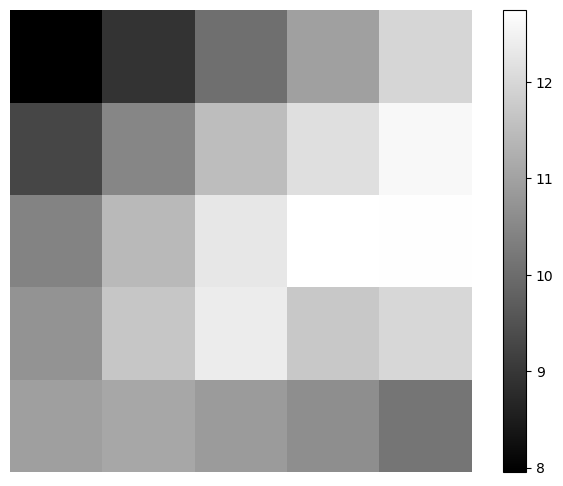

Corners found at [[1, 2], [2, 3]]


In [56]:
# Q12: harris measure
data = np.load("materials/harris.npy", allow_pickle=True).item()
print(data.keys())

gxx = data["g*(I_x^2)"]
gyy = data["g*(I_y^2)"]
gxy = data["g*(I_x I_y)"]

k = 0.06
tau = 5

# Structure tensor
C = np.array([[gxx, gxy], [gxy, gyy]])

# Harris measure
a = C[0, 0]
b = C[1, 1]
c = C[0, 1]
r = a * b - c**2 - k * (a + b) ** 2
print(f"r.shape: {r.shape}")

# Perform 4-neigbourhood non-max suppression
c = []
for i in range(1, gxx.shape[0] - 1):
    for j in range(1, gxx.shape[1] - 1):
        if (
            r[i, j] > r[i + 1, j]
            and r[i, j] >= r[i - 1, j]
            and r[i, j] > r[i, j + 1]
            and r[i, j] >= r[i, j - 1]
            and r[i, j] > tau
        ):  # Threshold
            c.append([i, j])

plt.imshow(r, cmap="gray")
plt.gca().invert_yaxis()  # Origin at top-left corner
plt.axis("off")
plt.colorbar()
plt.show()
print(f"Corners found at {c}")

dict_keys(['g*(I_x^2)', 'g*(I_y^2)', 'g*(I_x I_y)'])
r.shape: (5, 5)


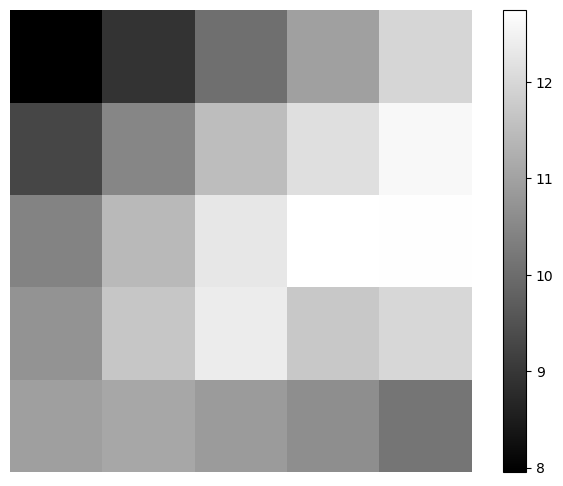

Corners found at [[2, 3]]


In [57]:
# Correct answer is found if 8-neighborhood
# non-max suppresssion is used
data = np.load("materials/harris.npy", allow_pickle=True).item()
print(data.keys())

gxx = data["g*(I_x^2)"]
gyy = data["g*(I_y^2)"]
gxy = data["g*(I_x I_y)"]

k = 0.06
tau = 5

# Structure tensor
C = np.array([[gxx, gxy], [gxy, gyy]])

# Harris measure
a = C[0, 0]
b = C[1, 1]
c = C[0, 1]
r = a * b - c**2 - k * (a + b) ** 2
print(f"r.shape: {r.shape}")

# Perform 4-neigbourhood non-max suppression

c = []
for i in range(1, gxx.shape[0] - 1):
    for j in range(1, gxx.shape[1] - 1):
        local_patch = r[i-1:i+2, j-1:j+2]
        center = r[i, j]
        # Check if center is strictly greater than all 8 neighbors and above threshold
        if center == np.max(local_patch) and center > tau and np.count_nonzero(local_patch == center) == 1:
            c.append([i, j])
plt.imshow(r, cmap="gray")
plt.gca().invert_yaxis()  # Origin at top-left corner
plt.axis("off")
plt.colorbar()
plt.show()
print(f"Corners found at {c}")

## Ans: h

# Q7
## Ans: e) We can find the pose without any ambiguity.

# Q8
## Ans: i

# Q9

In [58]:
import cv2

sift_data = np.load("materials/sift_data.npy", allow_pickle=True).item()
kp1 = sift_data["kp1"]
des1 = sift_data["des1"]
kp2 = sift_data["kp2"]
des2 = sift_data["des2"]
# RootSIFT transformation
def rootsift(desc):
    # L1 normalize
    desc_l1 = desc / (np.linalg.norm(desc, ord=1, axis=1, keepdims=True) + 1e-7)
    # Square root each element
    desc_sqrt = np.sqrt(desc_l1)
    # L2 normalize
    desc_l2 = desc_sqrt / (np.linalg.norm(desc_sqrt, axis=1, keepdims=True) + 1e-7)
    return desc_l2

des1_root = rootsift(des1)
des2_root = rootsift(des2)
# Use BFMatcher with L2 norm for RootSIFT
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)
matches = bf.knnMatch(des1_root, des2_root, k=2)

# Apply ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.8 * n.distance:
        good_matches.append(m)

print(f"Number of good matches: {len(good_matches)}")

Number of good matches: 331


# Q10

In [59]:
board0_img = cv2.imread("materials/board0.jpg")
board1_img = cv2.imread("materials/board1.jpg")
board2_img = cv2.imread("materials/board2.jpg")
board3_img = cv2.imread("materials/board3.jpg")
board4_img = cv2.imread("materials/board4.jpg")
board0_img.shape, board4_img.shape

((750, 1000, 3), (750, 1000, 3))

In [60]:
import os

In [61]:
# Q10: camera calibration
images = []
img_names = []
folder = "materials"
for filename in os.listdir(folder):
    # Check if the file is an image
    if filename.startswith("board"):
        # Read the image and append it to the list
        image_path = os.path.join(folder, filename)
        image = cv2.imread(image_path)
        images.append(image)
        img_names.append(filename)
print(f"{img_names} have been loaded.")

passed_idx = []
for i, im in enumerate(images):
    out = cv2.findChessboardCorners(im, (7, 10))

    if out != (False, None):
        passed_idx.append(i)
    else:
        print(f"Failed to find corners in {img_names[i]}")
        continue
    # Draw the corners
    im_corners = im.copy()
    cv2.drawChessboardCorners(im_corners, (7, 10), out[1], out[0])

    # plt.figure()
    # plt.title(img_names[i])
    # plt.imshow(cv2.cvtColor(im_corners, cv2.COLOR_BGR2RGB))

['board1.jpg', 'board0.jpg', 'board4.jpg', 'board2.jpg', 'board3.jpg'] have been loaded.


In [62]:
def checkerboard_points(n: int, m: int):
    """
    Generate 3D points of a checkerboard with n x m squares.

    Returns:
        points : 3 x (n*m) array of 3D points
    """
    points = np.array(
        [
            (
                i - (n - 1) / 2,
                j - (m - 1) / 2,
                0,
            )
            for i in range(n)
            for j in range(m)
        ],
    ).T
    return points

In [63]:
def estimate_homographies(Q_omega, qs):
    """
    Estimate homographies for each view.

    Args:
        Q_omega : 3 x (nxm) array of untransformed 3D points
        qs : list of 2xn arrays corresponding to each view, e.g. [qa, qb, qc]

    Returns:
        Hs : list of 3x3 homographies for each view
    """
    Hs = []
    Q = Q_omega[:2]  # remove 3rd row of zeros
    for q in qs:
        H = hest(q, Q)  # TODO: why hest(q, Q) instead of hest(Q, q)?
        Hs.append(H)
    return Hs

In [64]:
def form_vi(H: np.ndarray, a: int, b: int):
    """
    Form 1x6 vector vi using H and indices alpha, beta.

    Args:
        H (np.ndarray) : 3x3 homography
        a, b (int) : indices alpha, beta

    Returns:
        vi (np.ndarray) : 1x6 vector
    """
    # Use zero-indexing here. Notes uses 1-indexing.
    a = a - 1
    b = b - 1
    vi = np.array(
        [
            H[0, a] * H[0, b],
            H[0, a] * H[1, b] + H[1, a] * H[0, b],
            H[1, a] * H[1, b],
            H[2, a] * H[0, b] + H[0, a] * H[2, b],
            H[2, a] * H[1, b] + H[1, a] * H[2, b],
            H[2, a] * H[2, b],
        ],
    )
    vi = vi.reshape(1, 6)
    return vi

In [65]:
def estimate_b(Hs: np.ndarray):
    """
    Estimate b matrix used Zhang's method for camera calibration.

    Args:
        Hs (np.ndarray) : list of 3x3 homographies for each view

    Returns:
        b (np.ndarray) : 6x1 vector
    """
    V = []  # coefficient matrix
    # Create constraints in matrix form
    for H in Hs:
        vi_11 = form_vi(H, 1, 1)
        vi_12 = form_vi(H, 1, 2)
        vi_22 = form_vi(H, 2, 2)
        v = np.vstack((vi_12, vi_11 - vi_22))  # 2 x 6
        V.append(v)
    # V = np.array(V) creates the wrong array shape
    V = np.vstack(V)  # 2n x 6
    U, S, bt = np.linalg.svd(V.T @ V)
    b = bt[-1].reshape(6, 1)
    return b

In [66]:
def estimate_intrinsics(Hs: list[np.ndarray]):
    """
    Estimate intrinsic matrix using Zhang's method for camera calibration.

    Args:
        Hs : list of 3x3 homographies for each view

    Returns:
        K : 3x3 intrinsic matrix
    """
    b = estimate_b(Hs)
    B11, B12, B22, B13, B23, B33 = b
    # Appendix B of Zhang's paper
    v0 = (B12 * B13 - B11 * B23) / (B11 * B22 - B12**2)
    lambda_ = B33 - (B13**2 + v0 * (B12 * B13 - B11 * B23)) / B11
    alpha = np.sqrt(lambda_ / B11)
    beta = np.sqrt(lambda_ * B11 / (B11 * B22 - B12**2))
    gamma = -B12 * alpha**2 * beta / lambda_
    u0 = lambda_ * v0 / beta - B13 * alpha**2 / lambda_
    # above values are sequences [value], so using [0] below is needed
    K = np.array([[alpha[0], gamma[0], u0[0]], [0, beta[0], v0[0]], [0, 0, 1]])
    return K

In [67]:
def estimate_extrinsics(K, Hs):
    """
    Estimate extrinsic parameters using Zhang's method for camera calibration.

    Args:
        K : 3x3 intrinsic matrix
        Hs : list of 3x3 homographies for each view

    Returns:
        Rs : list of 3x3 rotation matrices
        ts : list of 3x1 translation vectors
    """
    Kinv = np.linalg.inv(K)
    Rs = []
    ts = []
    for H in Hs:  # H = [h1|h2|h3]
        h1 = H[:, 0]
        h2 = H[:, 1]
        h3 = H[:, 2]
        lambda_ = np.linalg.norm(Kinv @ h1, 2)
        r1 = 1 / lambda_ * Kinv @ h1  # (3,)
        r2 = 1 / lambda_ * Kinv @ h2
        r3 = np.cross(r1, r2)
        t = np.array(1 / lambda_ * Kinv @ h3).reshape(3, 1)  # 3 x 1
        R = np.vstack((r1, r2, r3)).T  # 3 x 3 [r1|r2|r3]
        Rs.append(R)
        ts.append(t)
    Rs = np.array(Rs)
    ts = np.array(ts)
    return Rs, ts

In [68]:
def calibrate_camera(qs, Q):
    """
    Calibrate camera using Zhang's method for camera calibration.

    Args:
        qs : list of 2xn arrays corresponding to each view
        Q : 3 x (nxm) array of untransformed 3D points

    Returns:
        K : 3x3 intrinsic matrix
        Rs : list of 3x3 rotation matrices
        ts : list of 3x1 translation vectors
    """
    Hs = estimate_homographies(Q, qs)
    K = estimate_intrinsics(Hs)
    Rs, ts = estimate_extrinsics(K, Hs)
    return K, Rs, ts

In [69]:
checker_size = 15  # mm
Q_omega = checkerboard_points(7, 10)  # corner points in 3D
Q_omega = Q_omega * checker_size / 1000  # 15mm between corners
# print(f"Q_omega:\n{Q_omega}")

new_Q_omega = np.zeros_like(Q_omega)
for i in range(7):  # rows
    for j in range(10):  # cols
        old_Q_idex = i * 10 + j
        new_Q_idx = j * 7 + (6 - i)
        new_Q_omega[:, new_Q_idx] = Q_omega[:, old_Q_idex]
        # print(f"Putting Q[{old_Q_idex}] in new_Q[{new_Q_idx}]")
# print(f"new_Q_omega:\n{new_Q_omega}")

# Calibrate camera
qs = []  # stores corner points from each image
for i in passed_idx:
    passed_im = images[i]
    out = cv2.findChessboardCorners(passed_im, (7, 10))
    # out[1]: 70x1x2 array of pixel points
    q = out[1].squeeze().T  # (2,70)
    qs.append(q)
qs = np.array(qs)  # (n_passed, 2, 70)

K_est, Rs, ts = calibrate_camera(qs, new_Q_omega)
print(f"K_est:\n{K_est}")
print(f"Estimated focal length center: {K_est[0,0]:.2f}")

K_est:
[[ 1.60774801e+03 -1.10561131e+01  4.81732932e+02]
 [ 0.00000000e+00  1.60049699e+03  2.90876336e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Estimated focal length center: 1607.75


## Ans: Not sure 1600

# Q11
## Ans: d

# Q12

In [70]:
import matplotlib as mpl

In [71]:
im1 = cv2.imread("materials/im1.jpg")[:, :, ::-1]
im2 = cv2.imread("materials/im2.jpg")[:, :, ::-1]


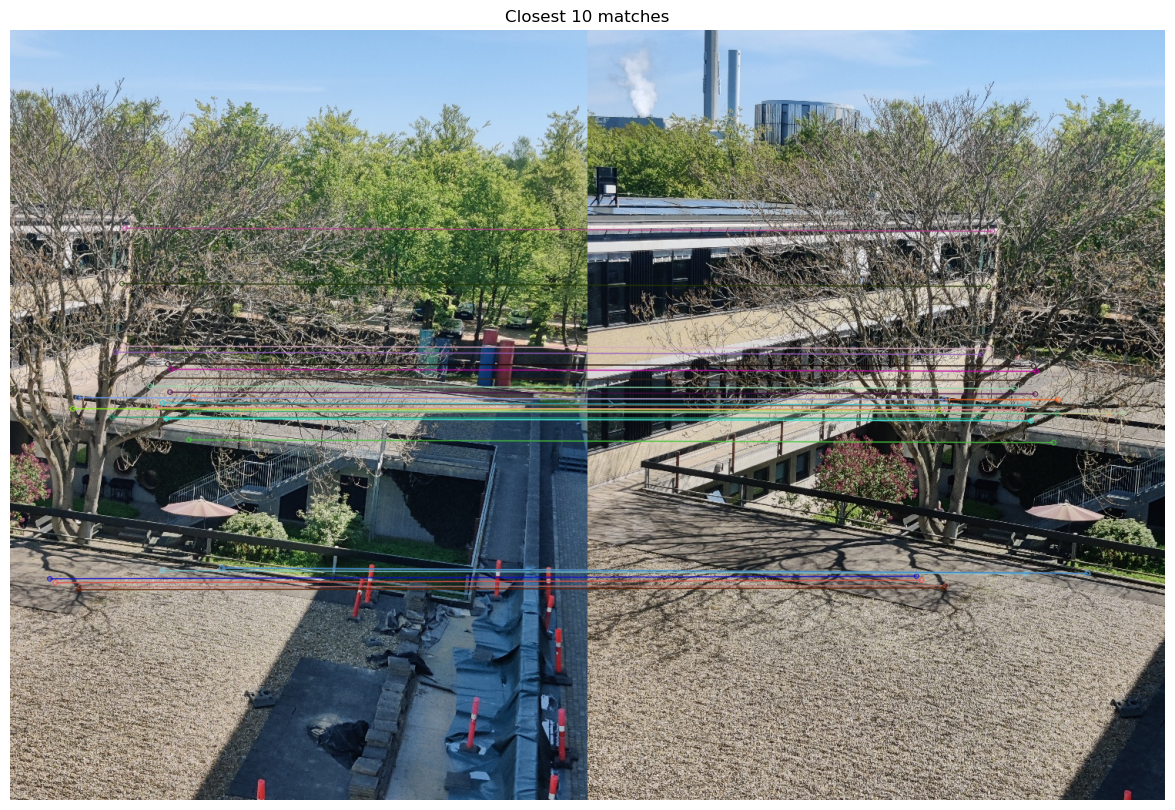

Number of matches: 3382


In [72]:
# Alernative
def find_features(im1, im2, plot=False):
    """
    Find matching features between two images.

    Args:
        im1 (np.ndarray): The first image.
        im2 (np.ndarray): The second image.

    Returns:
        matches (list): Matching features (cv2.DMatch objects).
        kp1 (list): Keypoints in the first image.
        kp2 (list): Keypoints in the second image.
    """
    # Initiate SIFT detector
    sift = cv2.SIFT_create()

    # Find the keypoints and descriptors with SIFT
    kp1, des1 = sift.detectAndCompute(im1, None)
    kp2, des2 = sift.detectAndCompute(im2, None)

    # Create BFMatcher object
    bf = cv2.BFMatcher(crossCheck=True)

    # Match descriptors
    matches = bf.match(des1, des2)
    matches = sorted(matches, key=lambda x: x.distance)  # ascending

    # Draw first 10 matches.
    if plot:
        img3 = cv2.drawMatches(
            im1,
            kp1,
            im2,
            kp2,
            matches[:30],
            None,
            flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS,
        )
        mpl.rcParams["figure.figsize"] = [15, 10]
        plt.imshow(img3)
        plt.axis("off")
        plt.title("Closest 10 matches")
        plt.show()
        mpl.rcParams["figure.figsize"] = [8, 6]

    return matches, kp1, kp2


# Feature matching is correct when the connecting lines are mostly parallel.
matches, kp1, kp2 = find_features(im1, im2, plot=True)
print(f"Number of matches: {len(matches)}")

In [73]:
def get_homo_error_distances(H: np.array, q1s: np.array, q2s: np.array):
    """
    q1 and q2 are a series of inhomogeneous points in two images matching the same object.
    They are related by the homography matrix, where q1 = H @ q2.
    This function finds the error of the projected estimate H by reprojections
        Args:
            H (np.array): Estimated homography matrix
            q1s (np.array): inhomogeneous points in first image
            q2s (np.array): inhomogeneous points in second image

        Return:
            distances (np.array): An estimate of homography matrix based on best inliers
    """
    distances = []
    num_points = q1s.shape[1]
    for i in range(num_points):
        q1 = q1s[:, i]
        q2 = q2s[:, i]
        p1 = Piinv(q1)
        p2 = Piinv(q2)
        distance = np.linalg.norm(q1 - Pi(H @ p2)) + np.linalg.norm(
            q2 - Pi(np.linalg.inv(H) @ p1)
        )
        distances.append(distance)
    return np.array(distances)

Best consensus of 1867 out of 3382 points.


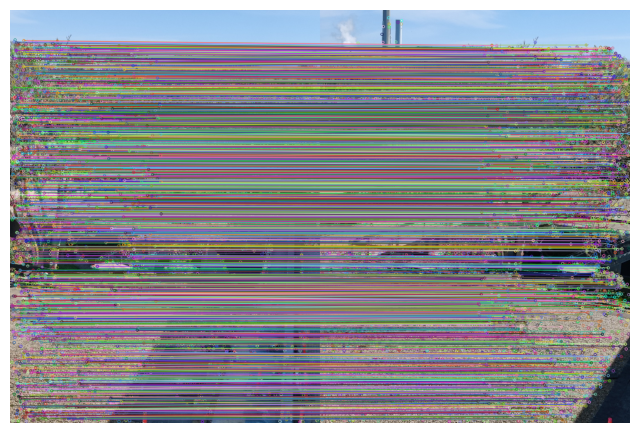

best_H:
[[ 2.60517336e-03  1.03179836e-05 -9.93119749e-01]
 [ 2.03166896e-04  2.51964389e-03 -1.17024535e-01]
 [ 4.44809125e-07 -1.82398070e-08  2.29043284e-03]]


In [74]:
def RANSAC_HOMOGRAPHY_MATRIX(
    im1: np.array, im2: np.array, iterations: int, threshold: float, plot: bool = False
):
    """
    Runs RANSAC for a number of iterations to find the best model with the most inliers
    and obtain an estimated homography matrix based on inliers.

    Args:
        im1 (np.array): first image
        im2 (np.array): second image
        iterations (int): number of iterations to run RANSAC
        threshold (float): threshold to determine whether a point is an inlier or outlier
        plot (bool): whether to visualize inlier matches

    Returns:
        best_H (np.array): An estimate of homography matrix based on best inliers
        best_inliers (np.array): Inliers of best homography (M, 2, 2)
    """
    most_inliers = 0
    best_inliers = None
    best_inlier_idxs = []
    best_H = None
    matches, kp1, kp2 = find_features(im1, im2)
    im1_matches = np.float32([kp1[m.queryIdx].pt for m in matches])  # Nx2
    im2_matches = np.float32([kp2[m.trainIdx].pt for m in matches])  # Nx2

    for _ in range(iterations):
        sampled_idx = np.random.choice(len(im1_matches), 4, replace=False)
        im1_samples = im1_matches[sampled_idx]  # 4x2
        im2_samples = im2_matches[sampled_idx]  # 4x2
        homo = hest(im1_samples.T, im2_samples.T)  # Assuming hest expects 2xN
        homo_distances = get_homo_error_distances(
            H=homo, q1s=im1_matches.T, q2s=im2_matches.T
        )  # Assuming 2xN input
        inlier_idxs = [
            idx for idx, dist in enumerate(homo_distances) if dist < threshold
        ]
        inliers = np.array(
            [[im1_matches[idx], im2_matches[idx]] for idx in inlier_idxs]
        )  # Mx2x2
        num_inliers = inliers.shape[0]

        if num_inliers > most_inliers:
            most_inliers = num_inliers
            best_inliers = inliers
            best_inlier_idxs = inlier_idxs
            best_H = homo

    if best_H is None:
        raise ValueError("RANSAC did not find any inliers.")

    # Refit homography using all inliers
    print(f"Best consensus of {most_inliers} out of {len(im1_matches)} points.")
    best_H = hest(best_inliers[:, 0].T, best_inliers[:, 1].T)

    if plot:
        plt.imshow(
            cv2.drawMatches(
                im1, kp1, im2, kp2, np.array(matches)[best_inlier_idxs], None
            )
        )
        plt.axis("off")
        plt.show()

    return best_H, best_inliers


# Example usage
sigma = 3
threshold = 5.99 * sigma**2
best_H, best_inliers = RANSAC_HOMOGRAPHY_MATRIX(
    im1, im2, iterations=200, threshold=threshold, plot=True
)
print(f"best_H:\n{best_H}")

In [75]:
ans = best_H / best_H[0][0]
ans

array([[ 1.00000000e+00,  3.96057466e-03, -3.81210619e+02],
       [ 7.79859410e-02,  9.67169374e-01, -4.49200568e+01],
       [ 1.70740701e-04, -7.00137935e-06,  8.79186343e-01]])

## Ans: A

# Q13
## Ans: A

# Q14
## Ans: A?

# Q15

In [76]:
K = np.array([[300, 0, 840], [0, 300, 620.0], [0, 0, 1]], float)
R1 = cv2.Rodrigues(np.array([-2.3, -0.7, 1.0]))[0]
t1 = np.array([0.0, -1.0, 4.0], float)
R2 = cv2.Rodrigues(np.array([-0.6, 0.5, -0.9]))[0]
t2 = np.array([0.0, 0.0, 9.0], float)
R3 = cv2.Rodrigues(np.array([-0.1, 0.9, -1.2]))[0]
t3 = np.array([-1.0, -6.0, 28.0], float)

In [77]:
p1 = np.array([853.0, 656.0])
p2 = np.array([814.0, 655.0])
p3 = np.array([798.0, 535.0])

In [78]:
rot = R1 @ R2.T
t = t1 - rot @ t2
rot, t

(array([[-0.03098414, -0.58201291, -0.81258904],
        [ 0.09011027, -0.81129536,  0.5776504 ],
        [-0.99544971, -0.05532461,  0.07758263]]),
 array([ 7.3133014 , -6.19885357,  3.30175634]))

In [79]:
E = skew(t) @ rot
F = np.linalg.inv(K.T) @ E @ np.linalg.inv(K)
F

array([[ 6.52569426e-05,  3.35738753e-05, -8.35922485e-02],
       [ 7.97524629e-05, -1.68562137e-05, -6.73757369e-02],
       [-1.02705901e-01, -4.95547371e-02,  1.29588623e+02]])

In [80]:
l = F @ Piinv(p2)

In [81]:
q = Piinv(p1)
d = np.linalg.norm(l.T @ q) / (
    np.linalg.norm(q[-1]) * np.sqrt(l[0] ** 2.0 + l[1] ** 2.0)
)
d

np.float64(160.7320132410406)

In [82]:
Piinv(p1.reshape(2, 1))

array([[853.],
       [656.],
       [  1.]])

In [94]:
def essential_matrix(R: np.ndarray, t: np.ndarray):
    """
    Returns the essential matrix.

    Args:
        R : 3x3 matrix, rotation matrix
        t : 3x1 matrix, translation matrix

    Returns:
        E : 3x3 matrix, essential matrix
    """
    return skew(t) @ R

In [95]:
def fundamental_matrix(
    K1: np.ndarray,
    R1: np.ndarray,
    t1: np.ndarray,
    K2: np.ndarray,
    R2: np.ndarray,
    t2: np.ndarray,
):
    """
    Returns the fundamental matrix, assuming camera 1 coordinates are
    on top of global coordinates.

    Args:
        K1 : 3x3 matrix, intrinsic matrix of camera 1
        R1 : 3x3 matrix, rotation matrix of camera 1
        t1 : 3x1 matrix, translation matrix of camera 1
        K2 : 3x3 matrix, intrinsic matrix of camera 2
        R2 : 3x3 matrix, rotation matrix of camera 2
        t2 : 3x1 matrix, translation matrix of camera 2

    Returns:
        F : 3x3 matrix, fundamental matrix
    """
    if R1.shape != (3, 3) or R2.shape != (3, 3):
        raise ValueError("R1 and R2 must be 3x3 matrices")
    if t1.shape == (3,) or t2.shape == (3,):
        t1 = t1.reshape(-1, 1)
        t2 = t2.reshape(-1, 1)
    if t1.shape != (3, 1) or t2.shape != (3, 1):
        raise ValueError("t1 and t2 must be 3x1 matrices")
    if K1.shape != (3, 3) or K2.shape != (3, 3):
        raise ValueError("K1 and K2 must be 3x3 matrices")

    # When the {camera1} and {camera2} are not aligned with {global}
    R_tilde = R2 @ R1.T
    t_tilde = t2 - R_tilde @ t1

    E = essential_matrix(R_tilde, t_tilde)
    F = np.linalg.inv(K2).T @ E @ np.linalg.inv(K1)
    return F

In [96]:
# Q15: epipolar

K = np.array([[300, 0, 840], [0, 300, 620.0], [0, 0, 1]], float)
R1 = cv2.Rodrigues(np.array([-2.3, -0.7, 1.0]))[0]
t1 = np.array([0.0, -1.0, 4.0], float).reshape((3, 1))
R2 = cv2.Rodrigues(np.array([-0.6, 0.5, -0.9]))[0]
t2 = np.array([0.0, 0.0, 9.0], float).reshape((3, 1))
R3 = cv2.Rodrigues(np.array([-0.1, 0.9, -1.2]))[0]
t3 = np.array([-1.0, -6.0, 28.0], float).reshape((3, 1))

p1 = np.array([853.0, 656.0]).reshape((2, 1))
p2 = np.array([814.0, 655.0]).reshape((2, 1))
p3 = np.array([798.0, 535.0]).reshape((2, 1))

F = fundamental_matrix(K, R1, t1, K, R2, t2)

epiline_c1 = Piinv(p2).T @ F
dist = point_line_distance(epiline_c1.T, Piinv(p1))
dist

array([[160.73201324]])

Epipolar Lines in Stereo Vision
For a point p1 in Camera 1:

The epipolar line in Camera 2 is:

python
epiline_c2 = F @ p1   # Shape: (3,)
where p1 is in homogeneous coordinates (e.g., [u1, v1, 1]).

For a point p2 in Camera 2:

The epipolar line in Camera 1 is:

python
epiline_c1 = p2.T @ F   # Shape: (3,)
(or equivalently F.T @ p2).


Key Properties
Epipolar Constraint:

A correct match (p1, p2) will satisfy p2.T @ F @ p1 ≈ 0.

The distance from p2 to epiline_c2 measures matching correctness.

Visualization:

For every point in Camera 1, there’s a corresponding line in Camera 2 (and vice versa).

# Q16

In [83]:
P1 = projection_matrix(K, R1, t1.reshape(3,1))
P2 = projection_matrix(K, R2, t2.reshape(3,1))
P3 = projection_matrix(K, R3, t3.reshape(3,1))


In [84]:
import scipy.optimize


def triangulate_nonlin(pixel_coords: np.array, proj_matrices: np.array):
    """
    Given a list of pixel coordinates and projection matrices, triangulate to a common 3D point using a non linear approach
    Args:
        pixel_coords (np.array): list of pixel coordinates in inhomogeneous coordinates
        proj_matrices (np.array): list of projection matrices

    Return:
        triangle (np.array): triangulated 3D point
    """

    def compute_residuals(Q: np.array):
        """
        Compute residuals between projected points and observed pixel coordinates.
        Args:
            Q (np.array): Current estimate of 3D point (x, y, z) in homogeneous coordinates

        Return:
            residuals (np.array): Vector of residuals (differences between projected and observed points)
        """
        if Q.shape[0] == 3:
            Q = Piinv(Q)
        residuals = np.zeros(2 * len(pixel_coords))
        for i, q in enumerate(pixel_coords):
            projected_point = Pi(proj_matrices[i, :, :] @ Q)
            # Flatten
            diff_vector = q.reshape(-1) - projected_point.reshape(-1)
            residuals[2 * i : 2 * (i + 1)] = diff_vector
        return residuals

    # Initial guess
    x0 = triangulate(pixel_coords, proj_matrices).reshape(-1)
    least_error_3D = scipy.optimize.least_squares(compute_residuals, x0)
    return least_error_3D.x


Q_til_nonlin = triangulate_nonlin(np.array([p1.reshape(2, 1), p2.reshape(2, 1), p3.reshape(2, 1)]), np.array([P1, P2, P3]))
Pi(Q_til_nonlin)


Vt is [[-0.1283409   0.20705227  0.11496502  0.96303739]
 [ 0.93310456 -0.13799114  0.31081354  0.11691568]
 [-0.23029362  0.30256956  0.90223333 -0.20344908]
 [ 0.24455949  0.92007579 -0.27595835 -0.13228068]]


array([ 0.25476302, -1.53922603, -0.14898051])

# Ans: E

# Q17

In [97]:
R = cv2.Rodrigues(np.array([-1.9, 0.1, -0.2]))[0]
t = np.array([-1.7, 1.3, 1.5], float)

-R.T @ t

array([ 1.75298172,  1.89539444, -0.40562912])

## Ans: B

# Q18

In [86]:
# Ref frame of camera3
point = np.array([[-0.38], [0.1], [1.32]])
# Find the tf from camera3 to 2
# pos tf @ point
rot = R2 @ R3.T
t = t2 - rot @ t3 
point_cam2 = rot @ point + t.reshape(3, 1)
point_cam2


array([[  2.1880602 ],
       [ -5.26185229],
       [-17.77577456]])

## Ans: J

# Q19

In [87]:
p = 0.90
estimate_outlier_prob = 1 - 465 / 1177
num_iterations = np.log(1 - p) / np.log(1 - ((1 - estimate_outlier_prob) ** 4))
num_iterations

np.float64(93.36093153241099)

## Ans: d

# Q20

In [88]:
sigma_x = 1.4
sigma_y = 1.4
p = 0.95

In [89]:
from scipy.stats import chi2

# Degrees of freedom
df = 2

# Confidence level (90%)
confidence_level = 0.95

# Find the chi-squared critical value
chi_sq_value = chi2.ppf(confidence_level, df)
print(
    f"Chi-squared value for 95% confidence with {df} degrees of freedom: {chi_sq_value:.3f}"
)

Chi-squared value for 95% confidence with 2 degrees of freedom: 5.991


In [90]:
chi_sq = 5.991 # 90% confidence
sigma = 1.4
threshold = (chi_sq * sigma**2) ** 0.5
threshold**2

11.742359999999998

## Ans: o

# Q21
What is the unwrapped θ in this pixel?

In [91]:
primary = np.array([12, 9, 10, 13, 18, 25, 33, 40, 46, 49, 48, 45, 39, 31, 23, 17])
secondary = np.array([15, 29, 43, 49, 43, 29, 15, 10])
n_primary = 40
n_seconday = 41

In [92]:
n1 = n_primary
fft_primary = np.fft.rfft(primary, axis=0)
fourier_primary = fft_primary[1]
theta_primary = np.angle(fourier_primary)

fft_secondary = np.fft.rfft(secondary, axis=0)
fourier_secondary = fft_secondary[1]
theta_secondary = np.angle(fourier_secondary)

# Compute phase cue using heterodyne principle
theta_c = np.mod(theta_secondary - theta_primary, 2 * np.pi)

# Order of primary phase
o_primary = np.rint((n1 * theta_c - theta_primary) / (2 * np.pi))

# Estimate the phase
theta_est = np.mod((2 * np.pi * o_primary + theta_primary) / n1, 2 * np.pi)
theta_est


np.float64(1.321564682705066)

## Ans: c

# Q22
## Ans: c